In [1]:
# Ejemplo programación lineal con CVXopt
# Maximizar la función objetivo: f(x1,x2)=50·x1+40·x2
# Con las restricciones:
#   x1+x2-15=130
# 2·x1+    x2<=750
#   x1+    0 >=0
#    0+    x2>=0

In [2]:
# IMPORTANDO MÓDULOS NECESARIOS y TÍPICOS IO
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize
import cvxopt
import pulp
from pyomo.environ import *
from pyomo.opt import SolverFactory
import pyomo.environ

In [3]:
# Resolviendo el problema con cvxopt
A = cvxopt.matrix([[-1., -2., 1., 0.], # columna de x1
[-1.5, -1., 0., 1.]]) # columna de x2
b = cvxopt.matrix([750., 1000., 0., 0.]) # resultados
c = cvxopt.matrix([50., 40.]) # funcion objetivo
# resolviendo el problema
sol=cvxopt.solvers.lp(c,A,b)

     pcost       dcost       gap    pres   dres   k/t
 0: -2.5472e+04 -3.6797e+04  5e+03  0e+00  3e-01  1e+00
 1: -2.8720e+04 -2.9111e+04  1e+02  9e-17  9e-03  2e+01
 2: -2.8750e+04 -2.8754e+04  1e+00  2e-16  9e-05  2e-01
 3: -2.8750e+04 -2.8750e+04  1e-02  2e-16  9e-07  2e-03
 4: -2.8750e+04 -2.8750e+04  1e-04  8e-17  9e-09  2e-05
Optimal solution found.


In [4]:
# imprimiendo la solucion.
print('{0:.2f}, {1:.2f}'.format(sol['x'][0]*-1, sol['x'][1]*-1))

375.00, 250.00


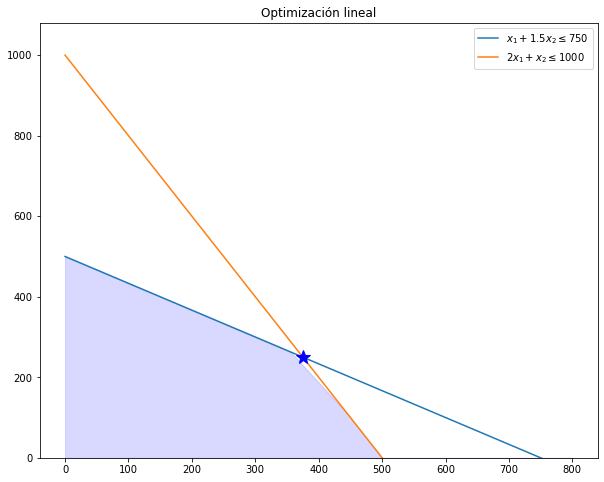

In [5]:
# Resolviendo la optimizacion graficamente.
x_vals = np.linspace(0, 800, 10) # 10 valores entre 0 y 800
y1 = ((750 - x_vals)/1.5) # x1 + 1.5x2 = 750
y2 = (1000 - 2*x_vals) # 2x1 + x2 = 1000
plt.figure(figsize=(10,8))
plt.plot(x_vals, y1, label=r'$x_1 + 1.5x_2 \leq 750$')
plt.plot(x_vals, y2, label=r'$2x_1 + x_2 \leq 1000$') #
plt.plot(375, 250, 'b*', markersize=15)
# Región factible
y3 = np.minimum(y1, y2)
plt.fill_between(x_vals, 0, y3, alpha=0.15, color='b')
plt.axis(ymin = 0)
plt.title('Optimización lineal')
plt.legend()
plt.show()

In [7]:
# Como podemos ver, tanto la solución utilizando CVXopt, como la solución gráfica; nos devuelven el mismo resultado x1=375 y x2=250.